Name: JOEL RAJU

Batch: R1

Date: 07-03-2023

Experiment Name: 3.2. Text Auto Completion

Experiment Description: The experiment aims at to complete text using a character-based RNN.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

You can create a data.txt file and put any text you want in it, or you can download a text file from the internet. For example, you can download the text of "The Adventures of Sherlock Holmes" by Arthur Conan Doyle from Project Gutenberg (https://www.gutenberg.org/ebooks/1661) and save it as data.txt:

In [ ]:
import urllib.request

url = 'https://www.gutenberg.org/files/1661/1661-0.txt'
urllib.request.urlretrieve(url, 'data.txt')

('data.txt', <http.client.HTTPMessage at 0x7f0aed9c0b20>)

This code downloads the text file from the given URL and saves it as data.txt in the current directory. You can then use this file as input to the text auto-completion code.

In [ ]:
# Load text data
with open('data.txt', 'r') as f:
    text = f.read()

In [ ]:
# Define parameters
max_len = 50
step = 3
batch_size = 128
epochs = 10
num_chars = len(set(text))
char_indices = dict((c, i) for i, c in enumerate(set(text)))

max_len: The maximum length of each input sequence. In this code, we use a sliding window of length max_len over the text to generate input and output sequences.

step: The step size of the sliding window. In this code, we move the window by step characters for each new input sequence.

num_chars: The number of unique characters in the text. This is used to determine the size of the input and output layers of the model.

char_indices: A dictionary that maps each unique character in the text to a unique integer index. This is used to convert the input and output sequences to one-hot encoded vectors, which can be fed into the model. The dictionary is created using the enumerate and set functions.

One-hot encoding is a way of representing categorical data as a binary vector, where each element in the vector corresponds to a unique category. In the context of text processing, we can use one-hot encoding to convert a sequence of characters into a sequence of vectors that can be fed into a neural network.

For example, suppose we have the following sequence of characters: "hello". We can one-hot encode this sequence as follows:

Determine the unique set of characters in the sequence: "h", "e", "l", "o".
Assign a unique integer index to each character: "h" = 0, "e" = 1, "l" = 2, "o" = 3.
Create an empty binary vector with length equal to the number of unique characters: [0, 0, 0, 0].
For each character in the sequence, set the corresponding element in the vector to 1: [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1]

Create empty lists 'sentences'and 'next_chars'.

Use a sliding window of length 'max_len' to extract input sequences from the text, with a step size of step. For each input sequence, append the next character in the text to next_chars, which will be used as the target output for the model.

Convert the input and output sequences to one-hot encoded vectors using the 'char_indices' dictionary. The input matrix x has shape (num_sequences, max_len, num_chars), where num_sequences is the number of input sequences, max_len is the length of each input sequence, and num_chars is the number of unique characters in the text. The output matrix y has shape (num_sequences, num_chars).

Set the value of each element in x and y to True if the corresponding character is present in the input sequence or target output, respectively. This creates a one-hot encoded matrix for each sequence.

Note that we use numpy arrays to store the one-hot encoded data, which allows us to efficiently perform matrix operations during training. This is important for deep learning models, which often require large amounts of data and computation to train effectively.


In [ ]:
# Generate input and output sequences
sentences = []
next_chars = []
for i in range(0, len(text) - max_len, step):
    sentences.append(text[i:i + max_len])
    next_chars.append(text[i + max_len])
x = np.zeros((len(sentences), max_len, num_chars), dtype=np.bool)
y = np.zeros((len(sentences), num_chars), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

<ipython-input-5-12af54401f9f>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(sentences), max_len, num_chars), dtype=np.bool)
<ipython-input-5-12af54401f9f>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), num_chars), dtype=np.bool)


In [ ]:
# Build model
model = keras.Sequential([
    keras.layers.LSTM(128, input_shape=(max_len, num_chars)),
    keras.layers.Dense(num_chars, activation='softmax')
])

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               116224    
                                                                 
 dense_1 (Dense)             (None, 98)                12642     
                                                                 
Total params: 128,866
Trainable params: 128,866
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# Train model
history=model.fit(x, y, batch_size=batch_size, validation_data=(x, y), callbacks=[early_stop], epochs=30)

Epoch 1/30
1515/1515 [==============================] - 19s 13ms/step - loss: 1.8745 - accuracy: 0.4516 - precision: 0.7412 - recall: 0.2634 - val_loss: 1.8437 - val_accuracy: 0.4598 - val_precision: 0.7384 - val_recall: 0.2779
Epoch 2/30
1515/1515 [==============================] - 16s 11ms/step - loss: 1.8287 - accuracy: 0.4635 - precision: 0.7460 - recall: 0.2780 - val_loss: 1.7945 - val_accuracy: 0.4734 - val_precision: 0.7569 - val_recall: 0.2823
Epoch 3/30
1515/1515 [==============================] - 16s 11ms/step - loss: 1.7832 - accuracy: 0.4751 - precision: 0.7522 - recall: 0.2918 - val_loss: 1.7512 - val_accuracy: 0.4851 - val_precision: 0.7700 - val_recall: 0.2927
Epoch 4/30
1515/1515 [==============================] - 21s 14ms/step - loss: 1.7408 - accuracy: 0.4858 - precision: 0.7573 - recall: 0.3074 - val_loss: 1.7027 - val_accuracy: 0.4978 - val_precision: 0.7642 - val_recall: 0.3182
Epoch 5/30
1515/1515 [==============================] - 16s 11ms/step - loss: 1.6997 - a

Model Evaluation

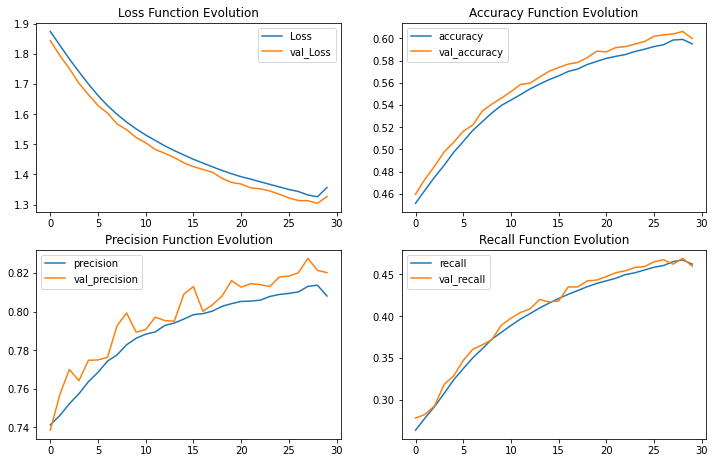

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [ ]:
# Generate text
def generate_text(model, seed_text, max_len, temperature=1.0):
    generated_text = seed_text
    for i in range(max_len):
        x_pred = np.zeros((1, max_len, num_chars))
        for t, char in enumerate(generated_text[-max_len:]):
            x_pred[0, t, char_indices[char]] = 1
        predictions = model.predict(x_pred)[0]
        predictions = np.log(predictions) / temperature
        predictions = np.exp(predictions) / np.sum(np.exp(predictions))
        next_char = np.random.choice(list(char_indices.keys()), p=predictions)
        generated_text += next_char
    return generated_text

This code block defines a function generate_text that can be used to generate new text using a trained text auto-completion model. Here's how it works:

Initialize the generated text with the seed_text.

For max_len iterations, do the following:

Create a new input vector x_pred by one-hot encoding the last max_len characters of the generated text.

Use the model to predict the probabilities of the next character, given the input vector.

Apply a temperature scaling parameter to the predicted probabilities, which controls the "creativity" of the generated text. Higher values of temperature will result in more diverse and unpredictable text, while lower values will result in more predictable text.

Sample the next character from the probability distribution using np.random.choice.

Append the sampled character to the generated text.

Return the generated text.

Note that the generate_text function assumes that the num_chars and char_indices variables have already been defined, which should be the case if the training data was prepared using the code block in the previous answer. The temperature parameter is optional and defaults to 1.0, but it can be adjusted to control the diversity of the generated text.

In [ ]:
# Test model
seed_text = 'The quick brown fox jumps over the lazy dog'
generated_text = generate_text(model, seed_text, 20)
print(generated_text)

1/1 [==============================] - 0s 27ms/step
The quick brown fox jumps over the lazy dogled acour of say whi
